In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats  # use for QQ plot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [4]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
df

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [8]:
X = df.iloc[:,1:3]
Y = df.iloc[:,0]

In [9]:
X

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [10]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

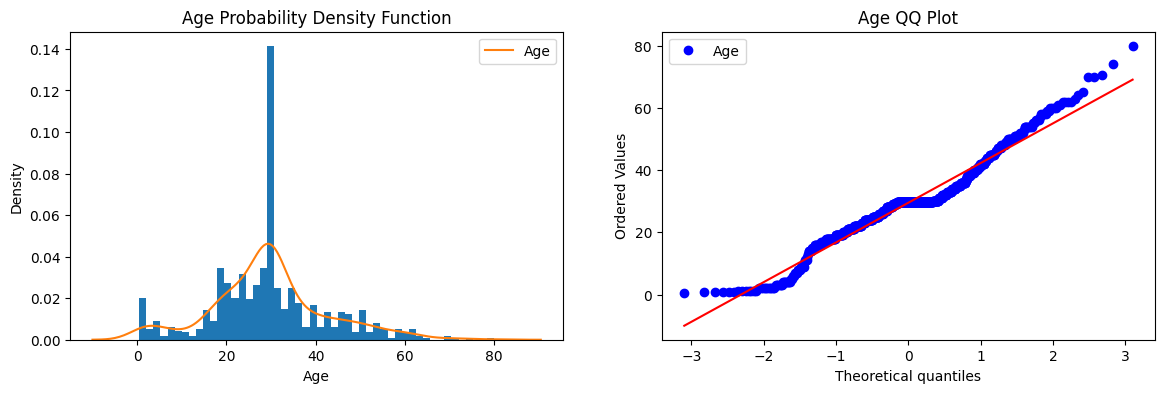

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(X_train['Age'],50, density=True)
sns.kdeplot(X_train['Age'])
plt.title('Age Probability Density Function')
plt.legend(['Age'])

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')
plt.legend(['Age'])

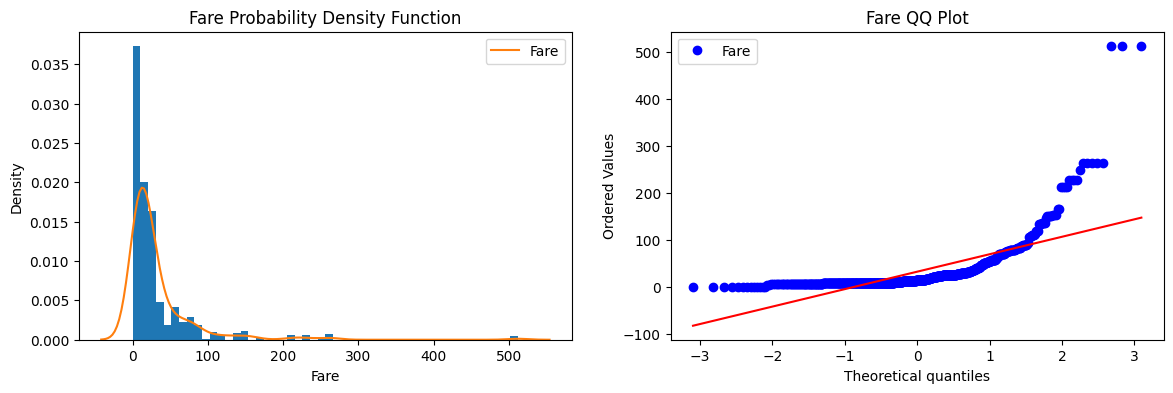

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(X_train['Fare'],50, density=True)
sns.kdeplot(X_train['Fare'])
plt.title('Fare Probability Density Function')
plt.legend(['Fare'])

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ Plot')
plt.legend(['Fare'])

In [28]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [30]:
clf1.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)

Y_pred_1 = clf1.predict(X_test)
Y_pred_2 = clf2.predict(X_test)

print("Accuracy in Logistic Regression",accuracy_score(Y_pred_1,Y_test))

print("Accuracy in Decision Tree Classifier",accuracy_score(Y_pred_2,Y_test))

Accuracy in Logistic Regression 0.6480446927374302
Accuracy in Decision Tree Classifier 0.6703910614525139


In [31]:
trf  =FunctionTransformer(func=np.log1p) # add one to value and then find log to omit 0.

In [32]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [33]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)

Y_pred_1 = clf1.predict(X_test_transformed)
Y_pred_2 = clf2.predict(X_test_transformed)

print("Accuracy in Logistic Regression",accuracy_score(Y_pred_1,Y_test))

print("Accuracy in Decision Tree Classifier",accuracy_score(Y_pred_2,Y_test))

Accuracy in Logistic Regression 0.6815642458100558
Accuracy in Decision Tree Classifier 0.6815642458100558


### Note: 
      1.Decision Tree has no impact of tranformer, where as logistic has changed its performance.
      2. Checking the Cross Validation score will gurantee me wheter it is fine or not.

In [34]:
X_transformed = trf.fit_transform(X)

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("Linear Regresssion Cross Validation SCore",np.mean(cross_val_score(clf1,X_transformed,Y,scoring = 'accuracy', cv=10)))

print("Decision Tree Classifier Cross Validation SCore",np.mean(cross_val_score(clf2,X_transformed,Y,scoring = 'accuracy', cv=10)))


Linear Regresssion Cross Validation SCore 0.678027465667915
Decision Tree Classifier Cross Validation SCore 0.6577153558052434


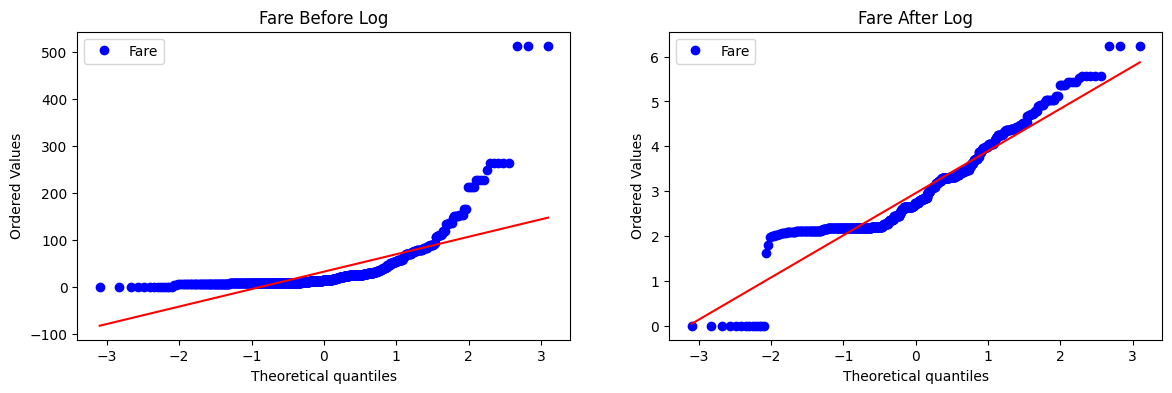

In [42]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm',plot=plt)
plt.title('Fare Before Log')
plt.legend(['Fare'])

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm',plot=plt)
plt.title('Fare After Log')
plt.legend(['Fare'])
plt.show()

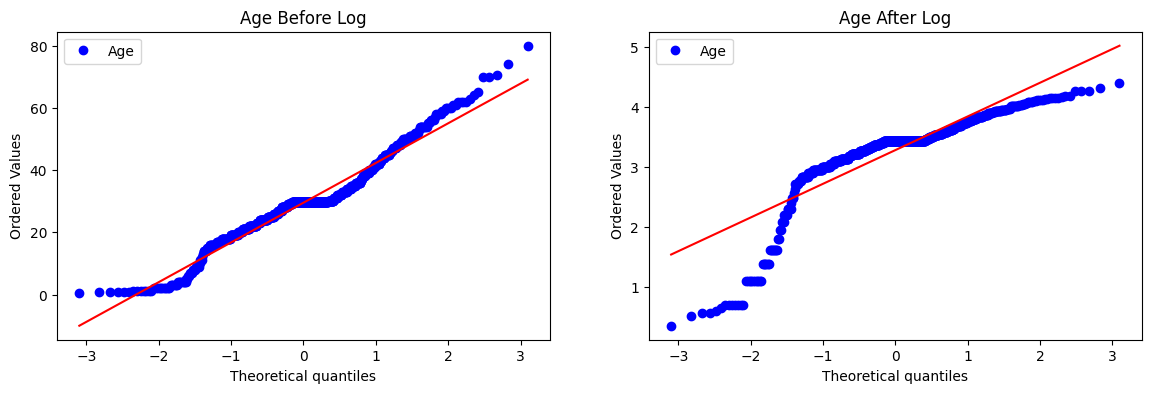

In [41]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm',plot=plt)
plt.title('Age Before Log')
plt.legend(['Age'])

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm',plot=plt)
plt.title('Age After Log')
plt.legend(['Age'])
plt.show()

### Note:
    1. Log transform on Age is not so good as of previous.

In [43]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder="passthrough")

X_train_transformed = trf2.fit_transform(X_train)
X_test_transformed = trf2.fit_transform(X_test)

In [44]:
lf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)

Y_pred_1 = clf1.predict(X_test_transformed)
Y_pred_2 = clf2.predict(X_test_transformed)

print("Accuracy in Logistic Regression only if Fare was Tarnsformed",accuracy_score(Y_pred_1,Y_test))

print("Accuracy in Decision Tree Classifier only if Fare was Transformed",accuracy_score(Y_pred_2,Y_test))

Accuracy in Logistic Regression only if Fare was Tarnsformed 0.6703910614525139
Accuracy in Decision Tree Classifier only if Fare was Transformed 0.6536312849162011


In [45]:
X_transformed = trf2.fit_transform(X)

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("Linear Regresssion Cross Validation SCore",np.mean(cross_val_score(clf1,X_transformed,Y,scoring = 'accuracy', cv=10)))

print("Decision Tree Classifier Cross Validation SCore",np.mean(cross_val_score(clf2,X_transformed,Y,scoring = 'accuracy', cv=10)))

Linear Regresssion Cross Validation SCore 0.6712609238451936
Decision Tree Classifier Cross Validation SCore 0.6610861423220974


In [61]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    Y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,Y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

    

Accuracy 0.6589013732833957


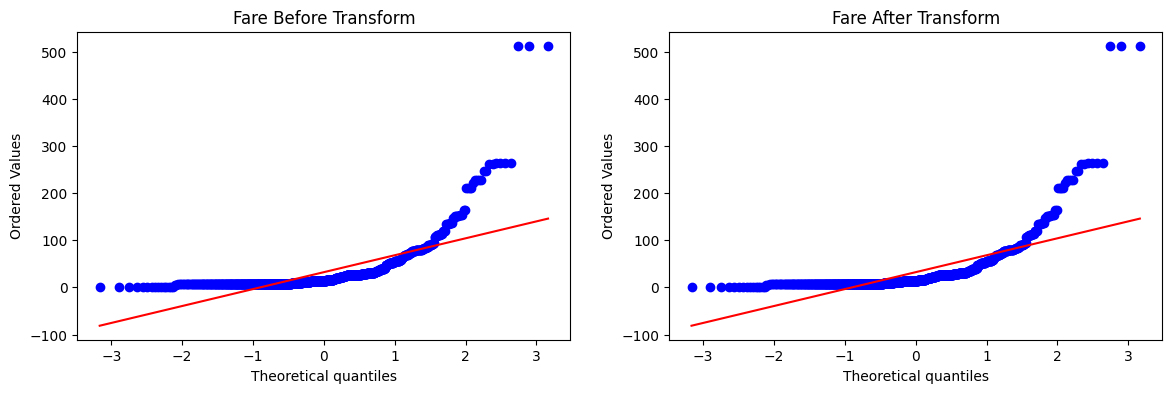

In [62]:
apply_transform(lambda x:x)

Accuracy 0.6442446941323345


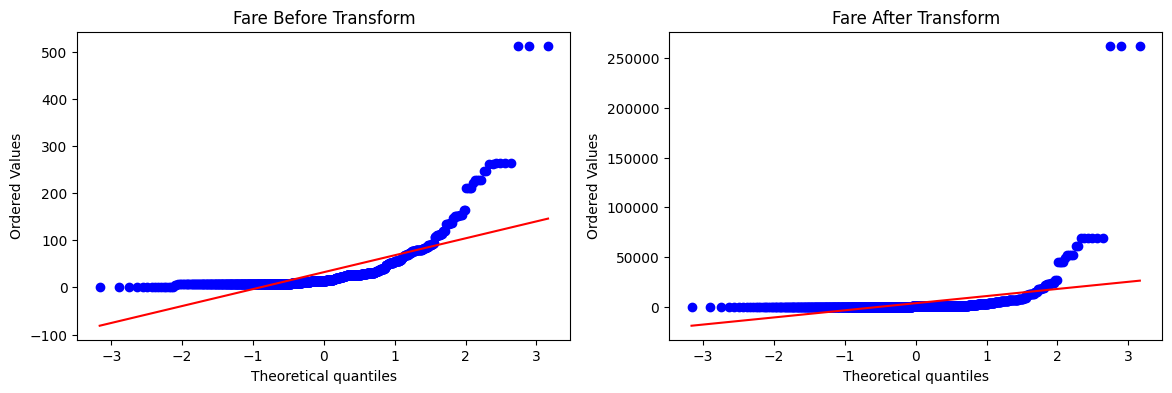

In [64]:
apply_transform(lambda x: x**2)

Accuracy 0.6589013732833957


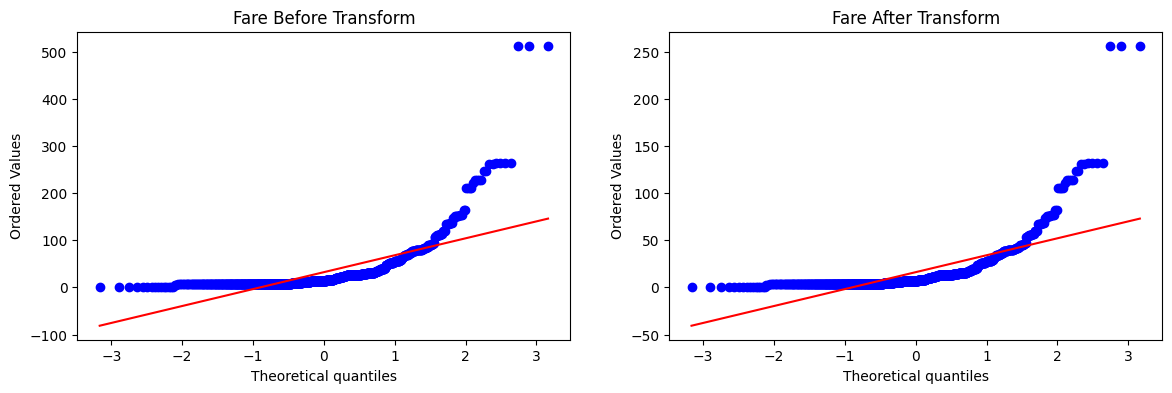

In [65]:
apply_transform(lambda x: x**1/2)

Accuracy 0.6150561797752809


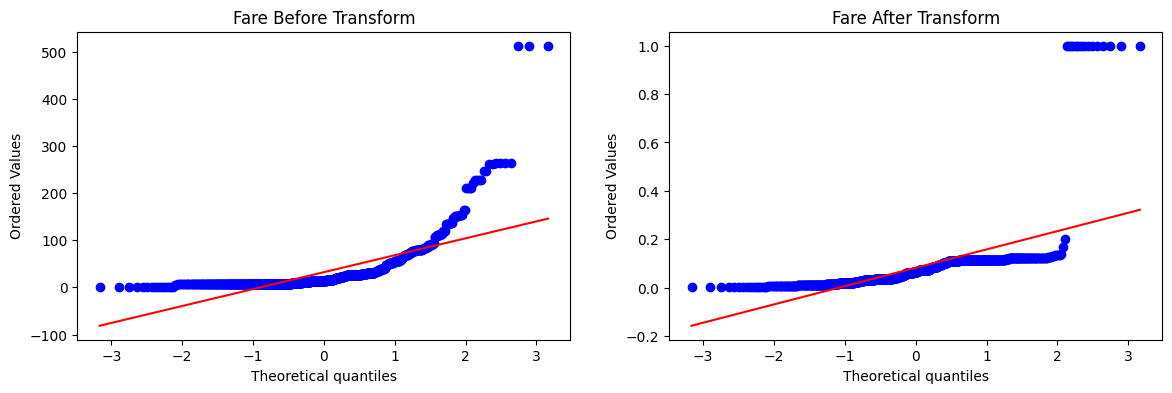

In [68]:
apply_transform(lambda x: 1/(x+1))

Accuracy 0.6195131086142323


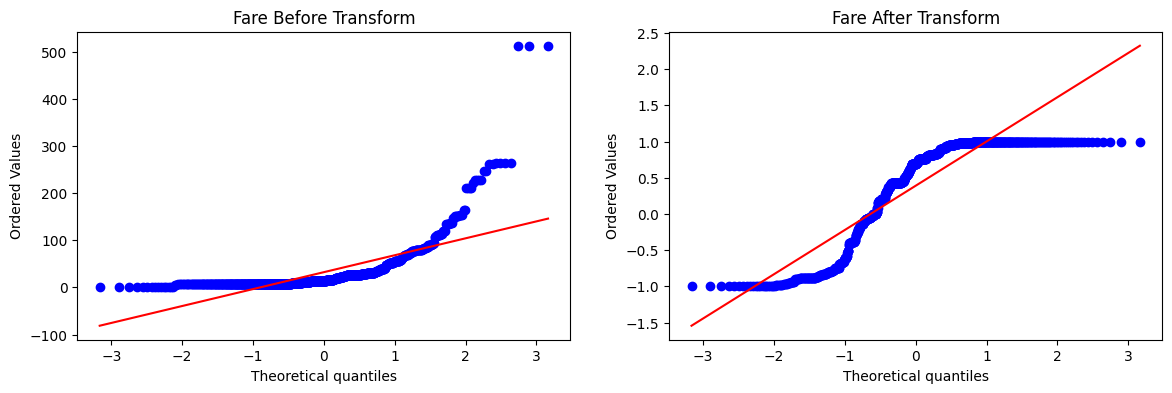

In [69]:
apply_transform(np.sin)